In [1]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Input
from tensorflow.keras import layers
import tensorflow as tf
import tensorflow.keras.backend as K

from scipy import stats
import numpy as np

In [2]:
arff_data = arff.loadarff('../data/TimeBasedFeatures-Dataset-15s.arff')
df = pd.DataFrame(arff_data[0])
df.head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,b'CHAT'
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,b'CHAT'
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,b'CHAT'
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,b'CHAT'
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,b'CHAT'


In [3]:
# z=np.abs(stats.zscore(df.iloc[:,:-1]))
# df = df[(z < 3).all(axis=1)]

In [4]:
df = df.sample(frac=1, random_state=7)


In [5]:
one_hot_data = pd.get_dummies(df, columns=['class1'])
one_hot_data.head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,class1_b'P2P',class1_b'STREAMING',class1_b'VOIP',class1_b'VPN-BROWSING',class1_b'VPN-CHAT',class1_b'VPN-FT',class1_b'VPN-MAIL',class1_b'VPN-P2P',class1_b'VPN-STREAMING',class1_b'VPN-VOIP'
10522,10077838.0,10038706.0,10039116.0,10038706.0,10039116.0,1.000000e+07,1.000000e+07,0.000000e+00,0.000000e+00,0.396911,...,0,0,0,0,0,0,0,0,0,1
18549,718114.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.785073,...,1,0,0,0,0,0,0,0,0,0
16986,8685091.0,201516.0,60660.0,4665497.0,5005972.0,1.447515e+06,1.382756e+06,1.676552e+06,1.938030e+06,1.611958,...,0,0,0,1,0,0,0,0,0,0
13297,14136349.0,76.0,2.0,3862438.0,3862906.0,2.355979e+05,1.859972e+05,6.166078e+05,5.536257e+05,9.762068,...,0,0,0,0,0,0,0,0,0,0
17619,14944023.0,213709.0,14721134.0,14730314.0,14721134.0,7.472012e+06,1.470000e+07,1.030000e+07,0.000000e+00,0.334582,...,0,0,0,1,0,0,0,0,0,0


In [6]:
X = stats.zscore(df.iloc[:, :-1].values)

In [7]:
encoder = Sequential([
                      Dense(128, input_shape=(X.shape[-1], ), activation='sigmoid'),
                      Dense(64, activation='sigmoid'),
    
                      Dense(2, activation='sigmoid'),
                    
])

In [8]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3072      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 11,458
Trainable params: 11,458
Non-trainable params: 0
_________________________________________________________________


In [9]:
decoder = Sequential([
                      Dense(64, input_shape=(2, ), activation='sigmoid'),
                    Dense(128, activation='sigmoid'),
                      Dense(X.shape[-1]),
])

In [10]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 23)                2967      
Total params: 11,479
Trainable params: 11,479
Non-trainable params: 0
_________________________________________________________________


In [11]:
autoencoder = Sequential([
                          encoder,
                          decoder
])

In [12]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 2)                 11458     
_________________________________________________________________
sequential_1 (Sequential)    (None, 23)                11479     
Total params: 22,937
Trainable params: 22,937
Non-trainable params: 0
_________________________________________________________________


In [13]:
autoencoder.compile(optimizer= 'adam', loss = 'MSE', metrics= ['accuracy'])

In [14]:
autoencoder.fit(X, X, batch_size= 10000, epochs= 2000)

Epoch 1/2000
2/2 [==============================] - 0s 5ms/step - loss: 1.2357 - accuracy: 0.0000e+00
Epoch 2/2000
2/2 [==============================] - 0s 5ms/step - loss: 1.1192 - accuracy: 0.0000e+00
Epoch 3/2000
2/2 [==============================] - 0s 5ms/step - loss: 1.0498 - accuracy: 0.0000e+00
Epoch 4/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.9599 - accuracy: 0.0000e+00
Epoch 5/2000
2/2 [==============================] - 0s 6ms/step - loss: 0.9370 - accuracy: 0.0000e+00
Epoch 6/2000
2/2 [==============================] - 0s 4ms/step - loss: 1.0478 - accuracy: 0.0000e+00
Epoch 7/2000
2/2 [==============================] - 0s 4ms/step - loss: 1.0406 - accuracy: 0.0571
Epoch 8/2000
2/2 [==============================] - 0s 5ms/step - loss: 1.0338 - accuracy: 0.0596
Epoch 9/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.9954 - accuracy: 0.0639
Epoch 10/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.9497 - accuracy: 0.

2/2 [==============================] - 0s 3ms/step - loss: 0.9245 - accuracy: 0.2116
Epoch 84/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.9051 - accuracy: 0.2114
Epoch 85/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.8967 - accuracy: 0.2106
Epoch 86/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.8865 - accuracy: 0.2101
Epoch 87/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.8450 - accuracy: 0.2098
Epoch 88/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.8761 - accuracy: 0.2112
Epoch 89/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.8514 - accuracy: 0.2098
Epoch 90/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.8332 - accuracy: 0.2103
Epoch 91/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.8534 - accuracy: 0.2115
Epoch 92/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.8220 - accuracy: 0.2091
Epoch 93/2000
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 0.6659 - accuracy: 0.0636
Epoch 165/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.6311 - accuracy: 0.0659
Epoch 166/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.6470 - accuracy: 0.0619
Epoch 167/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.6375 - accuracy: 0.0593
Epoch 168/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5906 - accuracy: 0.0619
Epoch 169/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.6620 - accuracy: 0.1847
Epoch 170/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.6126 - accuracy: 0.2105
Epoch 171/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.6395 - accuracy: 0.1044
Epoch 172/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.6116 - accuracy: 0.0584
Epoch 173/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.6649 - accuracy: 0.0643
Epoch 174/2000


2/2 [==============================] - 0s 3ms/step - loss: 0.5366 - accuracy: 0.0581
Epoch 247/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5336 - accuracy: 0.0569
Epoch 248/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.5606 - accuracy: 0.0578
Epoch 249/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.6112 - accuracy: 0.2337
Epoch 250/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.5779 - accuracy: 0.1861
Epoch 251/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.5483 - accuracy: 0.0581
Epoch 252/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.5773 - accuracy: 0.0558
Epoch 253/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5541 - accuracy: 0.0583
Epoch 254/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.5837 - accuracy: 0.1018
Epoch 255/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5201 - accuracy: 0.0589
Epoch 256/2000


2/2 [==============================] - 0s 3ms/step - loss: 0.5200 - accuracy: 0.0604
Epoch 329/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5205 - accuracy: 0.0610
Epoch 330/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.5216 - accuracy: 0.0605
Epoch 331/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5258 - accuracy: 0.0604
Epoch 332/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.5257 - accuracy: 0.0617
Epoch 333/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4970 - accuracy: 0.0607
Epoch 334/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.5235 - accuracy: 0.0643
Epoch 335/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5442 - accuracy: 0.0756
Epoch 336/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.5393 - accuracy: 0.0615
Epoch 337/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5118 - accuracy: 0.0629
Epoch 338/2000


2/2 [==============================] - 0s 4ms/step - loss: 0.4790 - accuracy: 0.0665
Epoch 411/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.4772 - accuracy: 0.0617
Epoch 412/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5023 - accuracy: 0.0623
Epoch 413/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.4755 - accuracy: 0.0622
Epoch 414/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.4671 - accuracy: 0.0624
Epoch 415/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4403 - accuracy: 0.0631
Epoch 416/2000
2/2 [==============================] - 0s 6ms/step - loss: 0.4872 - accuracy: 0.0624
Epoch 417/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5007 - accuracy: 0.0623
Epoch 418/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.4990 - accuracy: 0.0623
Epoch 419/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4739 - accuracy: 0.0615
Epoch 420/2000


2/2 [==============================] - 0s 4ms/step - loss: 0.4570 - accuracy: 0.0645
Epoch 493/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4777 - accuracy: 0.0649
Epoch 494/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4564 - accuracy: 0.0628
Epoch 495/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4461 - accuracy: 0.0637
Epoch 496/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.4369 - accuracy: 0.0634
Epoch 497/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.4465 - accuracy: 0.0639
Epoch 498/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.4318 - accuracy: 0.0640
Epoch 499/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.4572 - accuracy: 0.0637
Epoch 500/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.4392 - accuracy: 0.0640
Epoch 501/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.4385 - accuracy: 0.0634
Epoch 502/2000


2/2 [==============================] - 0s 3ms/step - loss: 0.4402 - accuracy: 0.0636
Epoch 574/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4566 - accuracy: 0.0639
Epoch 575/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.4210 - accuracy: 0.0641
Epoch 576/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4228 - accuracy: 0.0633
Epoch 577/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.4174 - accuracy: 0.0639
Epoch 578/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4095 - accuracy: 0.0647
Epoch 579/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.4521 - accuracy: 0.0649
Epoch 580/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4213 - accuracy: 0.0648
Epoch 581/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3816 - accuracy: 0.0638
Epoch 582/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4235 - accuracy: 0.0644
Epoch 583/2000


2/2 [==============================] - 0s 3ms/step - loss: 0.4404 - accuracy: 0.0650
Epoch 656/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.4384 - accuracy: 0.0635
Epoch 657/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.4375 - accuracy: 0.0641
Epoch 658/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.4238 - accuracy: 0.0644
Epoch 659/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4018 - accuracy: 0.0644
Epoch 660/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.4145 - accuracy: 0.0633
Epoch 661/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4187 - accuracy: 0.0644
Epoch 662/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4222 - accuracy: 0.0645
Epoch 663/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.4184 - accuracy: 0.0668
Epoch 664/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4258 - accuracy: 0.0641
Epoch 665/2000


2/2 [==============================] - 0s 5ms/step - loss: 0.3870 - accuracy: 0.0809
Epoch 737/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3925 - accuracy: 0.0801
Epoch 738/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4107 - accuracy: 0.0800
Epoch 739/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3922 - accuracy: 0.0815
Epoch 740/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4086 - accuracy: 0.0810
Epoch 741/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3970 - accuracy: 0.0811
Epoch 742/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4087 - accuracy: 0.0814
Epoch 743/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3993 - accuracy: 0.0822
Epoch 744/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.0817
Epoch 745/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4033 - accuracy: 0.0811
Epoch 746/2000


2/2 [==============================] - 0s 4ms/step - loss: 0.3627 - accuracy: 0.1025
Epoch 818/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3928 - accuracy: 0.1036
Epoch 819/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3980 - accuracy: 0.1046
Epoch 820/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3779 - accuracy: 0.1055
Epoch 821/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3998 - accuracy: 0.1067
Epoch 822/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4115 - accuracy: 0.1072
Epoch 823/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.4255 - accuracy: 0.1060
Epoch 824/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3806 - accuracy: 0.1090
Epoch 825/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3740 - accuracy: 0.1092
Epoch 826/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4003 - accuracy: 0.1114
Epoch 827/2000


2/2 [==============================] - 0s 3ms/step - loss: 0.3609 - accuracy: 0.1276
Epoch 900/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3722 - accuracy: 0.1305
Epoch 901/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3699 - accuracy: 0.1315
Epoch 902/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3692 - accuracy: 0.1314
Epoch 903/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3749 - accuracy: 0.1299
Epoch 904/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3642 - accuracy: 0.1319
Epoch 905/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3784 - accuracy: 0.1329
Epoch 906/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3972 - accuracy: 0.1301
Epoch 907/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3678 - accuracy: 0.1311
Epoch 908/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3901 - accuracy: 0.1335
Epoch 909/2000


2/2 [==============================] - 0s 4ms/step - loss: 0.3676 - accuracy: 0.1335
Epoch 982/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3660 - accuracy: 0.1357
Epoch 983/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3547 - accuracy: 0.1321
Epoch 984/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3719 - accuracy: 0.1334
Epoch 985/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3668 - accuracy: 0.1334
Epoch 986/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3729 - accuracy: 0.1368
Epoch 987/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3776 - accuracy: 0.1347
Epoch 988/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3709 - accuracy: 0.1339
Epoch 989/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3685 - accuracy: 0.1337
Epoch 990/2000
2/2 [==============================] - 0s 6ms/step - loss: 0.3712 - accuracy: 0.1333
Epoch 991/2000


2/2 [==============================] - 0s 4ms/step - loss: 0.3727 - accuracy: 0.1331
Epoch 1063/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3335 - accuracy: 0.1339
Epoch 1064/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3764 - accuracy: 0.1347
Epoch 1065/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3757 - accuracy: 0.1345
Epoch 1066/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3621 - accuracy: 0.1342
Epoch 1067/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3633 - accuracy: 0.1350
Epoch 1068/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3715 - accuracy: 0.1344
Epoch 1069/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3915 - accuracy: 0.1338
Epoch 1070/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3638 - accuracy: 0.1342
Epoch 1071/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3486 - accuracy: 0.1337
Epoch 

2/2 [==============================] - 0s 4ms/step - loss: 0.3663 - accuracy: 0.1331
Epoch 1143/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3550 - accuracy: 0.1342
Epoch 1144/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3585 - accuracy: 0.1356
Epoch 1145/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3525 - accuracy: 0.1339
Epoch 1146/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3568 - accuracy: 0.1350
Epoch 1147/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3795 - accuracy: 0.1343
Epoch 1148/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3623 - accuracy: 0.1333
Epoch 1149/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3462 - accuracy: 0.1346
Epoch 1150/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3755 - accuracy: 0.1342
Epoch 1151/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3673 - accuracy: 0.1336
Epoch 

2/2 [==============================] - 0s 4ms/step - loss: 0.3676 - accuracy: 0.1343
Epoch 1224/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3535 - accuracy: 0.1339
Epoch 1225/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3730 - accuracy: 0.1336
Epoch 1226/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3599 - accuracy: 0.1342
Epoch 1227/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3370 - accuracy: 0.1339
Epoch 1228/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3695 - accuracy: 0.1353
Epoch 1229/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3466 - accuracy: 0.1349
Epoch 1230/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3553 - accuracy: 0.1331
Epoch 1231/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3565 - accuracy: 0.1343
Epoch 1232/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3509 - accuracy: 0.1358
Epoch 

2/2 [==============================] - 0s 3ms/step - loss: 0.3589 - accuracy: 0.1344
Epoch 1305/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3672 - accuracy: 0.1342
Epoch 1306/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3771 - accuracy: 0.1354
Epoch 1307/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3556 - accuracy: 0.1338
Epoch 1308/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3741 - accuracy: 0.1337
Epoch 1309/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3704 - accuracy: 0.1347
Epoch 1310/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3628 - accuracy: 0.1357
Epoch 1311/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3565 - accuracy: 0.1350
Epoch 1312/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3788 - accuracy: 0.1337
Epoch 1313/2000
2/2 [==============================] - 0s 6ms/step - loss: 0.3621 - accuracy: 0.1347
Epoch 

2/2 [==============================] - 0s 3ms/step - loss: 0.3607 - accuracy: 0.1363
Epoch 1386/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3608 - accuracy: 0.1336
Epoch 1387/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3460 - accuracy: 0.1354
Epoch 1388/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3664 - accuracy: 0.1356
Epoch 1389/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3375 - accuracy: 0.1345
Epoch 1390/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3482 - accuracy: 0.1345
Epoch 1391/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3499 - accuracy: 0.1363
Epoch 1392/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3596 - accuracy: 0.1354
Epoch 1393/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3419 - accuracy: 0.1366
Epoch 1394/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3740 - accuracy: 0.1363
Epoch 

2/2 [==============================] - 0s 5ms/step - loss: 0.3598 - accuracy: 0.1361
Epoch 1467/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3473 - accuracy: 0.1350
Epoch 1468/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3553 - accuracy: 0.1359
Epoch 1469/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3761 - accuracy: 0.1360
Epoch 1470/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3565 - accuracy: 0.1360
Epoch 1471/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3518 - accuracy: 0.1351
Epoch 1472/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3613 - accuracy: 0.1350
Epoch 1473/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3638 - accuracy: 0.1341
Epoch 1474/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3450 - accuracy: 0.1359
Epoch 1475/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3608 - accuracy: 0.1350
Epoch 

2/2 [==============================] - 0s 4ms/step - loss: 0.3482 - accuracy: 0.1375
Epoch 1548/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3323 - accuracy: 0.1361
Epoch 1549/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3690 - accuracy: 0.1369
Epoch 1550/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3598 - accuracy: 0.1380
Epoch 1551/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3485 - accuracy: 0.1352
Epoch 1552/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3687 - accuracy: 0.1350
Epoch 1553/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3401 - accuracy: 0.1383
Epoch 1554/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3489 - accuracy: 0.1359
Epoch 1555/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3438 - accuracy: 0.1363
Epoch 1556/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.1358
Epoch 

2/2 [==============================] - 0s 3ms/step - loss: 0.3297 - accuracy: 0.1370
Epoch 1629/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3439 - accuracy: 0.1349
Epoch 1630/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3284 - accuracy: 0.1368
Epoch 1631/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3511 - accuracy: 0.1357
Epoch 1632/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3553 - accuracy: 0.1362
Epoch 1633/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3285 - accuracy: 0.1355
Epoch 1634/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3312 - accuracy: 0.1374
Epoch 1635/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.1366
Epoch 1636/2000
2/2 [==============================] - 0s 8ms/step - loss: 0.3397 - accuracy: 0.1369
Epoch 1637/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3286 - accuracy: 0.1357
Epoch 

2/2 [==============================] - 0s 3ms/step - loss: 0.3359 - accuracy: 0.1374
Epoch 1710/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3470 - accuracy: 0.1384
Epoch 1711/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3317 - accuracy: 0.1373
Epoch 1712/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3265 - accuracy: 0.1388
Epoch 1713/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3373 - accuracy: 0.1377
Epoch 1714/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3458 - accuracy: 0.1390
Epoch 1715/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3180 - accuracy: 0.1367
Epoch 1716/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3382 - accuracy: 0.1355
Epoch 1717/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3299 - accuracy: 0.1382
Epoch 1718/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3501 - accuracy: 0.1364
Epoch 

2/2 [==============================] - 0s 3ms/step - loss: 0.3673 - accuracy: 0.1401
Epoch 1791/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3318 - accuracy: 0.1397
Epoch 1792/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3416 - accuracy: 0.1373
Epoch 1793/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3322 - accuracy: 0.1395
Epoch 1794/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3408 - accuracy: 0.1384
Epoch 1795/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3583 - accuracy: 0.1414
Epoch 1796/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3531 - accuracy: 0.1382
Epoch 1797/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3277 - accuracy: 0.1390
Epoch 1798/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3437 - accuracy: 0.1380
Epoch 1799/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3446 - accuracy: 0.1407
Epoch 

2/2 [==============================] - 0s 4ms/step - loss: 0.3443 - accuracy: 0.1427
Epoch 1872/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3233 - accuracy: 0.1395
Epoch 1873/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3235 - accuracy: 0.1417
Epoch 1874/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3375 - accuracy: 0.1429
Epoch 1875/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3364 - accuracy: 0.1413
Epoch 1876/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3203 - accuracy: 0.1397
Epoch 1877/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3556 - accuracy: 0.1414
Epoch 1878/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3414 - accuracy: 0.1450
Epoch 1879/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3302 - accuracy: 0.1419
Epoch 1880/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3369 - accuracy: 0.1404
Epoch 

2/2 [==============================] - 0s 3ms/step - loss: 0.3343 - accuracy: 0.1462
Epoch 1953/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3228 - accuracy: 0.1461
Epoch 1954/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3233 - accuracy: 0.1454
Epoch 1955/2000
2/2 [==============================] - 0s 7ms/step - loss: 0.2992 - accuracy: 0.1447
Epoch 1956/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3008 - accuracy: 0.1477
Epoch 1957/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3160 - accuracy: 0.1480
Epoch 1958/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3073 - accuracy: 0.1479
Epoch 1959/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3016 - accuracy: 0.1441
Epoch 1960/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3147 - accuracy: 0.1416
Epoch 1961/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3256 - accuracy: 0.1474
Epoch 

In [15]:
prediction = encoder.predict(X)

In [16]:
autoencoder.predict(X)

array([[ 0.01489131,  3.9104538 ,  3.9963782 , ...,  0.48298168,
         0.4616844 , -0.13870862],
       [-0.19198252, -0.22986668, -0.23887834, ..., -0.23472403,
        -0.24263705, -0.10727167],
       [ 0.15840156, -0.2732181 , -0.2967231 , ...,  0.12171547,
         0.15308169,  0.23133859],
       ...,
       [ 0.31116438, -0.14536142, -0.16211388, ...,  0.3536113 ,
         0.39483   ,  0.3754847 ],
       [-0.16540433, -0.23752332, -0.24839786, ..., -0.21514378,
        -0.2190067 , -0.08182264],
       [ 0.21938615, -0.2495557 , -0.27220443, ...,  0.20747392,
         0.24316292,  0.29027507]], dtype=float32)

In [17]:
X

array([[ 0.01989217,  4.20394913,  4.04591515, ...,  0.49538887,
         0.45086235, -0.16267785],
       [-0.63080276, -0.27135199, -0.26942339, ..., -0.24678308,
        -0.26850004, -0.16267785],
       [-0.07693263, -0.1815148 , -0.24334811, ..., -0.00491553,
         0.06711884,  0.55145444],
       ...,
       [ 0.2054978 , -0.27132881, -0.26941049, ...,  0.55476391,
         0.50980116, -0.16267785],
       [ 0.36150032, -0.27133148, -0.26941178, ..., -0.24678308,
        -0.26850004, -0.16267785],
       [-0.24580143, -0.27100203, -0.26940147, ...,  0.16532986,
         0.13094724, -0.16267785]])

In [18]:
hot = plt.get_cmap('Paired')
cNorm  = colors.Normalize(vmin=0, vmax=len(df.iloc[:,-1].unique()))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

In [19]:
def plot_prediction(prediction):
    plt.figure(figsize=(10,10))
    for i, label in enumerate(df.iloc[:,-1].unique()):
        indx = df.iloc[:,-1] == label
        plt.scatter(prediction[indx][:,0], prediction[indx][:,1], label=label, color=scalarMap.to_rgba(i))
        plt.legend(loc='lower left')

    plt.ylabel('PC2')
    plt.xlabel('PC1');

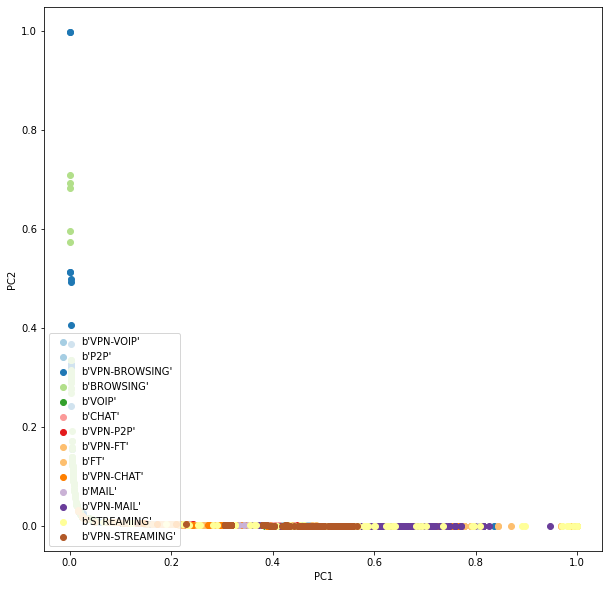

In [20]:
plot_prediction(prediction)

In [21]:
# import plotly.express as px


In [22]:
# df.iloc[:, -1].shape

In [23]:
# prediction.shape

In [24]:
# df_prediction = pd.DataFrame(data = prediction, columns = ['PC'+ str(i + 1) for i in range(prediction.shape[1])])
# df_prediction['value'] = df.iloc[:, -1].values

In [25]:
# fig = px.scatter_3d(df_prediction, x='PC1', y='PC2', z='PC3',
#               color='value')
# fig.show()

In [148]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim), stddev=1)
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [149]:
class Intermediate(layers.Layer):

    def __init__(self, latent_dim=3, name="Intermediate", **kwargs):
        super(Intermediate, self).__init__(name=name, **kwargs)
        self.mean = Dense(latent_dim)
        self.log_var = Dense(latent_dim)
        self.sampling = Sampling()

    def call(self, inputs):
        z_mean = self.mean(inputs)
        z_log_var = self.log_var(inputs)
        z = self.sampling((z_mean, z_log_var))
        return z_mean, z_log_var, z

In [150]:
latent_model = Sequential([
                      Dense(128, input_shape=(X.shape[-1], ), activation='sigmoid'),
                      Dense(64, activation='sigmoid'),
                           ], name = 'latent_model')

In [151]:
latent_dim = 2

In [152]:
def build_encoder(inp):
    x = latent_model(inp)
    z_mean, z_log_var, z = Intermediate(latent_dim=latent_dim)(x)
    model = Model(inp, z, name='Encoder')
    return z_mean, z_log_var, model  

In [153]:
inp= Input(shape= (X.shape[-1], ), name='Input')
z_mean, z_log_var, vae_encoder = build_encoder(inp)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [154]:
vae_encoder.summary()

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 23)]              0         
_________________________________________________________________
latent_model (Sequential)    (None, 64)                11328     
_________________________________________________________________
Intermediate (Intermediate)  ((None, 2), (None, 2), (N 260       
Total params: 11,588
Trainable params: 11,588
Non-trainable params: 0
_________________________________________________________________


In [155]:
vae_decoder = Sequential([
                      Dense(64, input_shape=(2, ), activation='sigmoid'),
                    Dense(128, activation='sigmoid'),
                      Dense(X.shape[-1]),
])

In [156]:
vae_autoencoder = Model(inputs = inp, outputs = vae_decoder(vae_encoder(inp)), name = 'AutoEncoder')

In [157]:
vae_autoencoder.summary()

Model: "AutoEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 23)]              0         
_________________________________________________________________
Encoder (Functional)         (None, 2)                 11588     
_________________________________________________________________
sequential_8 (Sequential)    (None, 23)                11479     
Total params: 23,067
Trainable params: 23,067
Non-trainable params: 0
_________________________________________________________________


In [158]:
def custom_loss(y_true, y_predict):
    mean_loss = K.mean(K.square(y_true-y_predict))

    return mean_loss

In [159]:
kl_loss = -5e-4 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
vae_autoencoder.add_loss(kl_loss, inputs=inp)

In [160]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
vae_autoencoder.compile(optimizer, loss = custom_loss, metrics = ['accuracy'])

In [161]:
vae_autoencoder.fit(X, X, batch_size= 10000, epochs= 200)

Epoch 1/200
2/2 [==============================] - 0s 5ms/step - loss: 1.2587 - accuracy: 2.8212e-04
Epoch 2/200
2/2 [==============================] - 0s 6ms/step - loss: 1.1999 - accuracy: 5.2869e-04
Epoch 3/200
2/2 [==============================] - 0s 5ms/step - loss: 1.1110 - accuracy: 0.0143
Epoch 4/200
2/2 [==============================] - 0s 6ms/step - loss: 1.0299 - accuracy: 0.0540
Epoch 5/200
2/2 [==============================] - 0s 5ms/step - loss: 1.0219 - accuracy: 0.0622
Epoch 6/200
2/2 [==============================] - 0s 5ms/step - loss: 1.0453 - accuracy: 0.0224
Epoch 7/200
2/2 [==============================] - 0s 6ms/step - loss: 0.9984 - accuracy: 0.0268
Epoch 8/200
2/2 [==============================] - 0s 6ms/step - loss: 1.0363 - accuracy: 0.0064
Epoch 9/200
2/2 [==============================] - 0s 6ms/step - loss: 0.9653 - accuracy: 0.0013
Epoch 10/200
2/2 [==============================] - 0s 6ms/step - loss: 1.0023 - accuracy: 0.0032
Epoch 11/200
2/2 [===

2/2 [==============================] - 0s 5ms/step - loss: 0.4376 - accuracy: 0.0935
Epoch 167/200
2/2 [==============================] - 0s 5ms/step - loss: 0.4453 - accuracy: 0.0943
Epoch 168/200
2/2 [==============================] - 0s 4ms/step - loss: 0.4674 - accuracy: 0.0939
Epoch 169/200
2/2 [==============================] - 0s 5ms/step - loss: 0.4707 - accuracy: 0.1015
Epoch 170/200
2/2 [==============================] - 0s 5ms/step - loss: 0.4533 - accuracy: 0.0933
Epoch 171/200
2/2 [==============================] - 0s 5ms/step - loss: 0.4586 - accuracy: 0.0862
Epoch 172/200
2/2 [==============================] - 0s 5ms/step - loss: 0.4488 - accuracy: 0.0926
Epoch 173/200
2/2 [==============================] - 0s 5ms/step - loss: 0.4721 - accuracy: 0.1106
Epoch 174/200
2/2 [==============================] - 0s 4ms/step - loss: 0.4301 - accuracy: 0.2008
Epoch 175/200
2/2 [==============================] - 0s 5ms/step - loss: 0.4694 - accuracy: 0.0970
Epoch 176/200
2/2 [=====

In [162]:
vae_prediction = vae_encoder.predict(X)

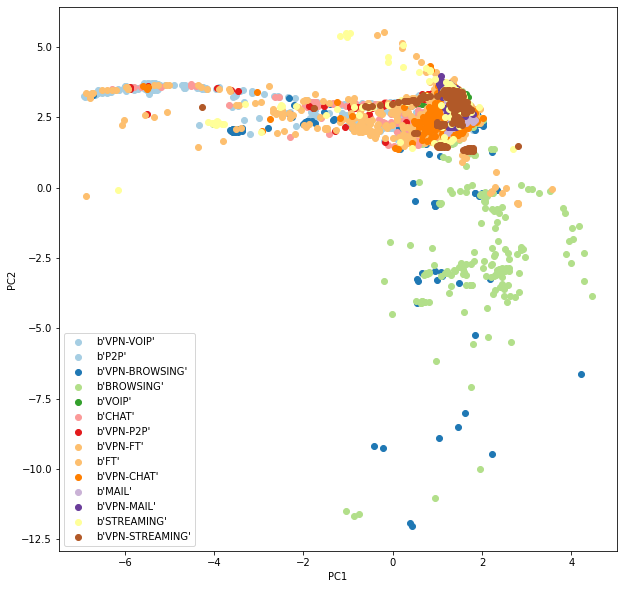

In [163]:
plot_prediction(vae_prediction)